In [20]:
# load packages
import torch
import pandas
import matplotlib as plt
import numpy as np
from sklearn.manifold import TSNE

In [2]:
# load distance matrix from file
distance_matrix = torch.load("../data/distance_matrix")
# transform distance matrix to 2-dimensional distance matrix
distance_matrix_embedded = TSNE(n_components=2, learning_rate='auto',
                                    init='random', perplexity=3).fit_transform(distance_matrix)

In [3]:
# get shape of transformed matrix
distance_matrix_embedded.shape

(7908, 2)

In [14]:
distance_matrix_embedded

array([[-14.723504, -19.819485],
       [-62.79598 , -55.431458],
       [-70.02359 , -74.90727 ],
       ...,
       [ 18.822607,  11.097119],
       [-52.594627,  32.990402],
       [-13.607525, 107.22636 ]], dtype=float32)

In [26]:
# turn matrix into pandas data frame
df = pandas.DataFrame(distance_matrix_embedded, columns=['x','y'])

In [27]:
# print head of df
df.head()

,x,y
0,-14.723504,-19.819485
1,-62.795979,-55.431458
2,-70.023590,-74.907272
3,39.917511,-12.553305
4,80.833084,-54.641739


In [29]:
df['x']

0      -14.723504
1      -62.795979
2      -70.023590
3       39.917511
4       80.833084
          ...    
7903   -74.659668
7904   -19.334000
7905    18.822607
7906   -52.594627
7907   -13.607525
Name: x, Length: 7908, dtype: float32

<Axes: xlabel='x', ylabel='y'>

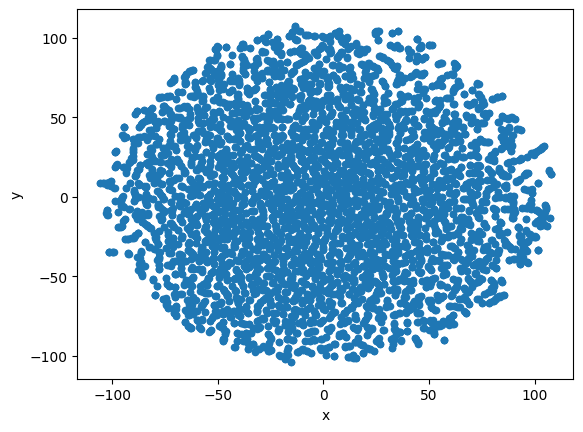

In [31]:
df.plot.scatter(x='x', y='y')